In [101]:
import pandas as pd
import re

df = pd.read_csv('/Volumes/HooToo/2021 05-14 IcSN ratios/ICSN_RATIOS_24HR.csv')
layout = pd.read_csv('/Volumes/HooToo/2021 05-14 IcSN ratios/ICSN_RATIOS_24_HRS_LAYOUT.csv')

wellstrparser = re.compile('([A-Q][0-9]{2})_[0-9]{3}')
wellstr2wellnbr = lambda wellstr: {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7}[wellstr[0]]*12+int(wellstr[1:])
wellstr2row = lambda wellstr: wellstr[0]
wellstr2col = lambda wellstr: int(wellstr[1:])
getwellstr = lambda name: re.findall(wellstrparser,name)[0]
def getlastgroup(name):
    groupsparser = re.compile('/([A-Za-z0-9-+\s]+)')
    groups = re.findall(groupsparser,name)
    if len(groups)<1:
        return ''
    else:
        return groups[-1]

df['row']=[wellstr2row(getwellstr(x)) for x in df['Name']]
df['col']=[wellstr2col(getwellstr(x)) for x in df['Name']]
df['w']=[wellstr2wellnbr(getwellstr(x)) for x in df['Name']]
df['lastgroup']=[getlastgroup(x) for x in df['Name']]
df['Depth']=[sum([x in ['>'] for x in str(y)]) for y in df['Depth'].values] 
    # reassigns depth string column to integers ("> > > " becomes 3 etc)

df = df.merge(layout,on='w',how='inner')
df

,Depth,Name,Statistic,#Cells,row,col,w,lastgroup,r,c,frx_ag_pos,frx_jurkat,aLFA
0,NaN,Specimen_001_B2_B02_001.fcs,NaN,33471,B,2,14,,2,2,50,0,0
1,>,Specimen_001_B2_B02_001.fcs/K562,24.90,8330,B,2,14,K562,2,2,50,0,0
2,> >,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-,97.00,8080,B,2,14,BLUE+ FR-,2,2,50,0,0
3,> > >,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-/GRE...,55.90,4519,B,2,14,GREEN+ RED-,2,2,50,0,0
4,> > >,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-/GRE...,0.48,39,B,2,14,GREEN+ RED+,2,2,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,> >,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-,56.40,21574,C,7,31,BLUE+ FR-,3,7,50,50,1
115,> > >,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,59.80,12912,C,7,31,GREEN+ RED-,3,7,50,50,1
116,> > >,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,0.35,76,C,7,31,GREEN+ RED+,3,7,50,50,1
117,> > >,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,0.37,80,C,7,31,GREEN- RED+,3,7,50,50,1


In [275]:
df

,Depth,Name,Statistic,#Cells,row,col,w,lastgroup,r,c,frx_ag_pos,frx_jurkat,aLFA
0,0,Specimen_001_B2_B02_001.fcs,NaN,33471,B,2,14,,2,2,50,0,0
1,1,Specimen_001_B2_B02_001.fcs/K562,24.90,8330,B,2,14,K562,2,2,50,0,0
2,2,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-,97.00,8080,B,2,14,BLUE+ FR-,2,2,50,0,0
3,3,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-/GRE...,55.90,4519,B,2,14,GREEN+ RED-,2,2,50,0,0
4,3,Specimen_001_B2_B02_001.fcs/K562/BLUE+ FR-/GRE...,0.48,39,B,2,14,GREEN+ RED+,2,2,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-,56.40,21574,C,7,31,BLUE+ FR-,3,7,50,50,1
115,3,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,59.80,12912,C,7,31,GREEN+ RED-,3,7,50,50,1
116,3,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,0.35,76,C,7,31,GREEN+ RED+,3,7,50,50,1
117,3,Specimen_017_C7_C07_017.fcs/K562/BLUE+ FR-/GRE...,0.37,80,C,7,31,GREEN- RED+,3,7,50,50,1


In [104]:
dfp = df.pivot(index='w',columns='lastgroup',values='Statistic').reset_index().merge(layout,on='w',how='inner')
dfp['ratio_green']=dfp['GREEN+ RED+']/(dfp['GREEN+ RED-']+dfp['GREEN+ RED+'])
dfp['ratio_ctrl']=dfp['GREEN- RED+']/(dfp['GREEN- RED-']+dfp['GREEN- RED+'])
dfp['ratioratio']=dfp['ratio_green']/dfp['ratio_ctrl']

dfp

,w,,BLUE+ FR-,GREEN+ RED+,GREEN+ RED-,GREEN- RED+,GREEN- RED-,K562,r,c,frx_ag_pos,frx_jurkat,aLFA,ratio_green,ratio_ctrl,ratioratio
0,14,NaN,97.0,0.480,55.90,0.35,43.2,24.9,2,2,50,0,0,0.008514,0.008037,1.059342
1,15,NaN,32.9,21.500,34.00,0.56,43.9,77.1,2,3,50,50,0,0.387387,0.012596,30.755792
2,16,NaN,35.1,7.200,48.90,0.49,43.4,76.7,2,4,50,10,0,0.128342,0.011164,11.495798
3,17,NaN,33.8,1.840,54.10,0.39,43.7,70.4,2,5,50,2,0,0.032892,0.008846,3.718526
4,18,NaN,34.0,17.400,39.40,0.53,42.7,64.4,2,6,50,50,0,0.306338,0.012260,24.986779
5,19,NaN,49.2,13.200,45.80,0.49,40.4,55.8,2,7,50,50,0,0.223729,0.011983,18.669941
6,26,NaN,97.8,0.110,14.30,0.80,84.8,70.2,3,2,10,0,0,0.007634,0.009346,0.816794
7,27,NaN,35.0,6.820,6.30,1.22,85.7,80.7,3,3,10,50,0,0.519817,0.014036,37.034836
8,28,NaN,37.3,2.820,10.70,0.91,85.6,84.3,3,4,10,10,0,0.208580,0.010519,19.828841
9,29,NaN,44.0,0.620,13.30,0.77,85.3,80.3,3,5,10,2,0,0.044540,0.008946,4.978672


In [103]:
dfp.to_clipboard()

In [95]:
df.to_clipboard()

In [109]:
dfg = dfp.groupby(['frx_ag_pos','frx_jurkat','aLFA']).agg({'ratio_green':['mean','sem'],'ratio_ctrl':['mean','sem'],'ratioratio':['mean','sem']})

In [113]:
dfg

ratio_green           ratio_ctrl            \
                                  mean       sem       mean       sem   
frx_ag_pos frx_jurkat aLFA                                              
2          0          0       0.008130       NaN   0.010003       NaN   
           2          0       0.105263       NaN   0.009298       NaN   
           10         0       0.331169       NaN   0.010626       NaN   
           50         0       0.522059       NaN   0.010481       NaN   
10         0          0       0.007634       NaN   0.009346       NaN   
           2          0       0.044540       NaN   0.008946       NaN   
           10         0       0.208580       NaN   0.010519       NaN   
           50         0       0.519817       NaN   0.014036       NaN   
50         0          0       0.008514       NaN   0.008037       NaN   
           2          0       0.032892       NaN   0.008846       NaN   
           10         0       0.128342       NaN   0.011164       NaN   
           50         0       0.305818  0.047245   0.012280  0.000177   
                      1       0.005967  0.000250   0.009481  0.000793   

                           ratioratio            
                                 mean       sem  
frx_ag_pos frx_jurkat aLFA                       
2          0          0      0.812757       NaN  
           2          0     11.321637       NaN  
           10         0     31.165238       NaN  
           50         0     49.810554       NaN  
10         0          0      0.816794       NaN  
           2          0      4.978672       NaN  
           10         0     19.828841       NaN  
           50         0     37.034836       NaN  
50         0          0      1.059342       NaN  
           2          0      3.718526       NaN  
           10         0     11.495798       NaN  
           50         0     24.804171  3.490079  
                      1      0.633874  0.027990

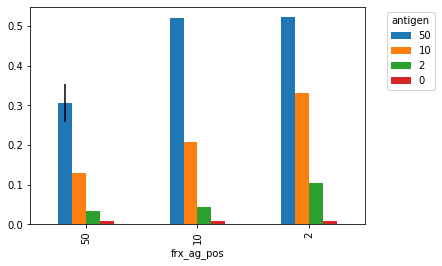

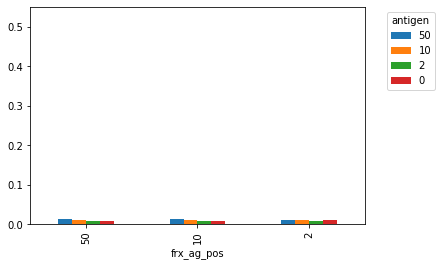

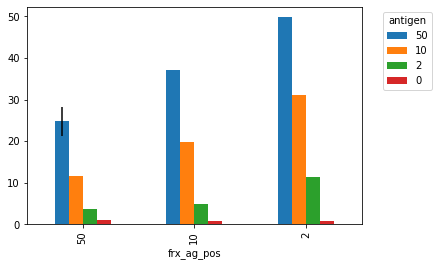

In [268]:
ratio_green_mean = dfg.loc[(slice(None),slice(None),0),(slice(None),'mean')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratio_green'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False)
ratio_green_sem = dfg.loc[(slice(None),slice(None),0),(slice(None),'sem')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratio_green'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False).fillna(0)
ratio_green_mean.loc[:,'mean'].plot.bar(yerr=ratio_green_sem.loc[:,'sem'])
plt.legend(title='antigen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/Users/jkgerdts/Google Drive/LAB/data/2021 05-17 MIcNramG aCD3 Jurkat mixing studies/Fig Bar frx pos green cells 24 hrs.pdf',bbox_inches='tight')

ratio_ctrl_mean = dfg.loc[(slice(None),slice(None),0),(slice(None),'mean')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratio_ctrl'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False)
ratio_ctrl_sem = dfg.loc[(slice(None),slice(None),0),(slice(None),'sem')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratio_ctrl'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False).fillna(0)
ax = ratio_ctrl_mean.loc[:,'mean'].plot.bar(yerr=ratio_ctrl_sem.loc[:,'sem'])
ax.set_ylim([0,0.55])
plt.legend(title='antigen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/Users/jkgerdts/Google Drive/LAB/data/2021 05-17 MIcNramG aCD3 Jurkat mixing studies/Fig Bar frx pos ctrl cells 24 hrs.pdf',bbox_inches='tight')

ratioratio_mean = dfg.loc[(slice(None),slice(None),0),(slice(None),'mean')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratioratio'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False)
ratioratio_sem = dfg.loc[(slice(None),slice(None),0),(slice(None),'sem')].reset_index().pivot(index='frx_ag_pos',columns='frx_jurkat').loc[:,'ratioratio'].sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False).fillna(0)
ratioratio_mean.loc[:,'mean'].plot.bar(yerr=ratioratio_sem.loc[:,'sem'])
plt.legend(title='antigen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/Users/jkgerdts/Google Drive/LAB/data/2021 05-17 MIcNramG aCD3 Jurkat mixing studies/Fig Bar ratios 24 hrs.pdf',bbox_inches='tight')



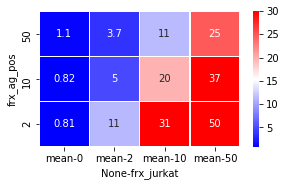

In [213]:
import seaborn as sn
fig, ax = plt.subplots(figsize = (4.5, 2.5))
sn.heatmap(ratioratio_mean, annot = True,vmin=0.8,linewidths=0.5,vmax=30,cmap='bwr')
ax.invert_yaxis()
plt.savefig('2021 05-20 IcSN a3_jurkat mixing 24 hrs.pdf',bbox_inches='tight')

In [261]:
ratio_green_mean.sort_index(ascending=False)

mean                              
frx_jurkat        0         2         10        50
frx_ag_pos                                        
50          0.008514  0.032892  0.128342  0.305818
10          0.007634  0.044540  0.208580  0.519817
2           0.008130  0.105263  0.331169  0.522059

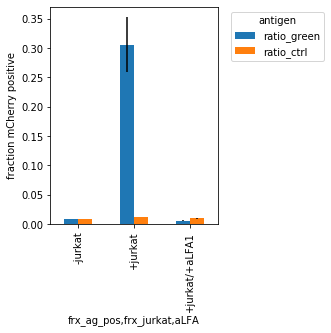

In [259]:
ds_temp = dfg.loc[(50,[0,50],slice(None)),(['ratio_green','ratio_ctrl'])]
fig,ax=plt.subplots(figsize=[3,4])
ds_temp.loc[:,(slice(None),'mean')].droplevel(1,axis=1).plot.bar(yerr=ds_temp.loc[:,(slice(None),'sem')].droplevel(1,axis=1),ax=ax)
ax.set_ylabel('fraction mCherry positive')
ax.set_xticklabels(['-jurkat','+jurkat','+jurkat/+aLFA1'])
plt.legend(title='antigen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/Users/jkgerdts/Google Drive/LAB/data/2021 05-17 MIcNramG aCD3 Jurkat mixing studies/bar graph 5050 aLFA.pdf',bbox_inches='tight')

In [246]:
ds_temp.loc[:,(slice(None),'sem')].droplevel(1,axis=1)

ratio_green  ratio_ctrl
frx_ag_pos frx_jurkat aLFA                         
50         0          0             NaN         NaN
           50         0        0.047245    0.000177
                      1        0.000250    0.000793

In [267]:
ratio_ctrl_mean.sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False)

mean                              
frx_jurkat        50        10        2         0 
frx_ag_pos                                        
50          0.012280  0.011164  0.008846  0.008037
10          0.014036  0.010519  0.008946  0.009346
2           0.010481  0.010626  0.009298  0.010003